In [1]:
# 必要なライブラリのインストール
! pip install pandas pandas-datareader matplotlib statsmodels seaborn

# ライブラリのインポート
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


US Cyclical Component Standard Deviation: 0.013194355527702654
Japan Cyclical Component Standard Deviation: 0.016100214544991626
Correlation Coefficient between US and Japan: 0.7120847414005763


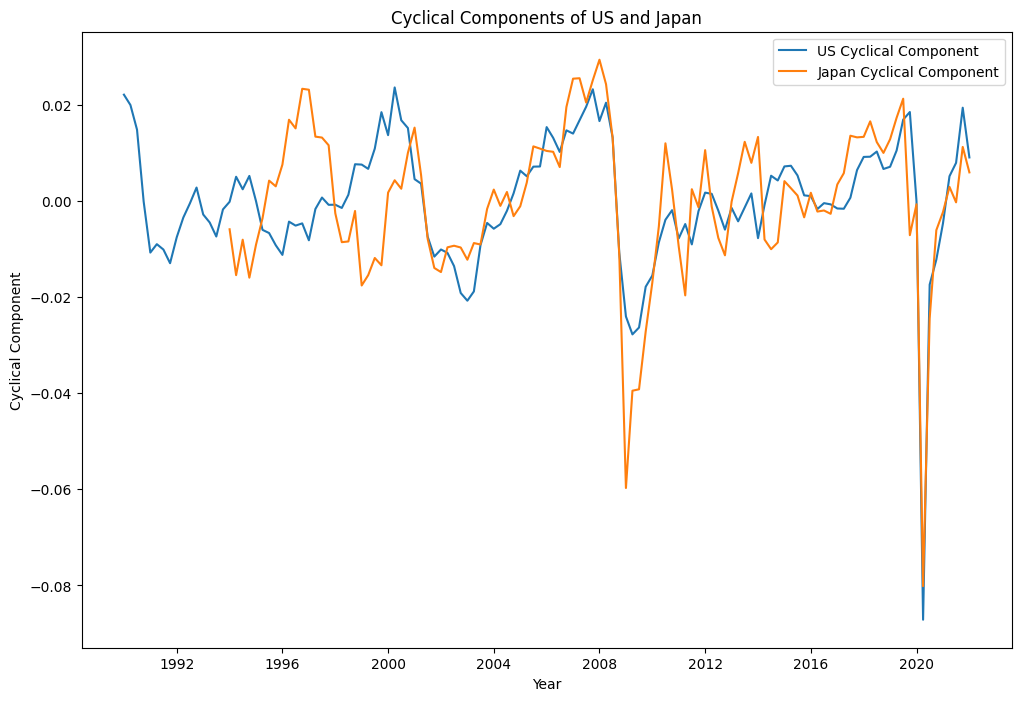

In [3]:
# データ取得の開始日と終了日を設定
start_date = '1990-01-01'
end_date = '2022-01-01'

# GDPデータの取得関数
def get_gdp_data(country_code):
    if country_code == "JPN":
        ticker = "JPNRGDPEXP"  # 日本の実質GDPデータ
    elif country_code == "US":
        ticker = "GDPC1"        # アメリカの実質GDPデータ
    else:
        return None
    
    gdp = web.DataReader(ticker, 'fred', start_date, end_date)
    return gdp

# HPフィルタ関数
def apply_hp_filter(gdp_series):
    cycle, trend = sm.tsa.filters.hpfilter(np.log(gdp_series), lamb=1600)
    return cycle, trend

# データの取得
gdp_us = get_gdp_data("US")
gdp_jp = get_gdp_data("JPN")

# HPフィルタの適用
cycle_us, trend_us = apply_hp_filter(gdp_us)
cycle_jp, trend_jp = apply_hp_filter(gdp_jp)

# 循環変動成分の標準偏差の計算と比較
std_us = cycle_us.std()
std_jp = cycle_jp.std()

print(f"US Cyclical Component Standard Deviation: {std_us}")
print(f"Japan Cyclical Component Standard Deviation: {std_jp}")

# 相関係数の計算
correlation = cycle_us.corr(cycle_jp)
print(f"Correlation Coefficient between US and Japan: {correlation}")

# グラフの描画
plt.figure(figsize=(12, 8))
plt.plot(cycle_us, label="US Cyclical Component")
plt.plot(cycle_jp, label="Japan Cyclical Component")
plt.title("Cyclical Components of US and Japan")
plt.xlabel("Year")
plt.ylabel("Cyclical Component")
plt.legend()
plt.show()

